<a href="https://colab.research.google.com/github/jecordjotse/hamoye/blob/master/STAGE_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOADING DATA AND PACKAGES

## Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Data

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

# EXPLORING DATA (DATA SUMMARY)

In [ ]:
df.describe()

tau1          tau2  ...            g4          stab
count  10000.000000  10000.000000  ...  10000.000000  10000.000000
mean       5.250000      5.250001  ...      0.525000      0.015731
std        2.742548      2.742549  ...      0.274255      0.036919
min        0.500793      0.500141  ...      0.050028     -0.080760
25%        2.874892      2.875140  ...      0.287494     -0.015557
50%        5.250004      5.249981  ...      0.525002      0.017142
75%        7.624690      7.624893  ...      0.762433      0.044878
max        9.999469      9.999837  ...      0.999930      0.109403

[8 rows x 13 columns]

In [ ]:
df.head()

tau1      tau2      tau3  ...        g4      stab     stabf
0  2.959060  3.079885  8.381025  ...  0.958034  0.055347  unstable
1  9.304097  4.902524  3.047541  ...  0.781760 -0.005957    stable
2  8.971707  8.848428  3.046479  ...  0.109853  0.003471  unstable
3  0.716415  7.669600  4.486641  ...  0.362718  0.028871  unstable
4  3.134112  7.608772  4.943759  ...  0.820923  0.049860  unstable

[5 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [ ]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [ ]:
df.corr()

tau1      tau2      tau3  ...        g3        g4      stab
tau1  1.000000  0.015586 -0.005970  ... -0.001279  0.005494  0.275761
tau2  0.015586  1.000000  0.014273  ...  0.016508 -0.011764  0.290975
tau3 -0.005970  0.014273  1.000000  ...  0.014702 -0.011497  0.280700
tau4 -0.017265 -0.001965  0.004354  ...  0.003260 -0.000491  0.278576
p1    0.027183 -0.004769  0.016953  ...  0.001069 -0.015451  0.010278
p2   -0.015485  0.006573 -0.003134  ...  0.007555  0.019817  0.006255
p3   -0.015924  0.007673 -0.008780  ... -0.005897 -0.010485 -0.003321
p4   -0.015807 -0.005963 -0.017531  ... -0.003515  0.017505 -0.020786
g1    0.010521 -0.001742 -0.011605  ... -0.005836  0.012431  0.282774
g2    0.015350  0.015383  0.007671  ... -0.012809 -0.014909  0.293601
g3   -0.001279  0.016508  0.014702  ...  1.000000  0.006900  0.308235
g4    0.005494 -0.011764 -0.011497  ...  0.006900  1.000000  0.279214
stab  0.275761  0.290975  0.280700  ...  0.308235  0.279214  1.000000

[13 rows x 13 columns]

# FEATURE ENGINEERING AND EDA

## Exploratory Data Analysis

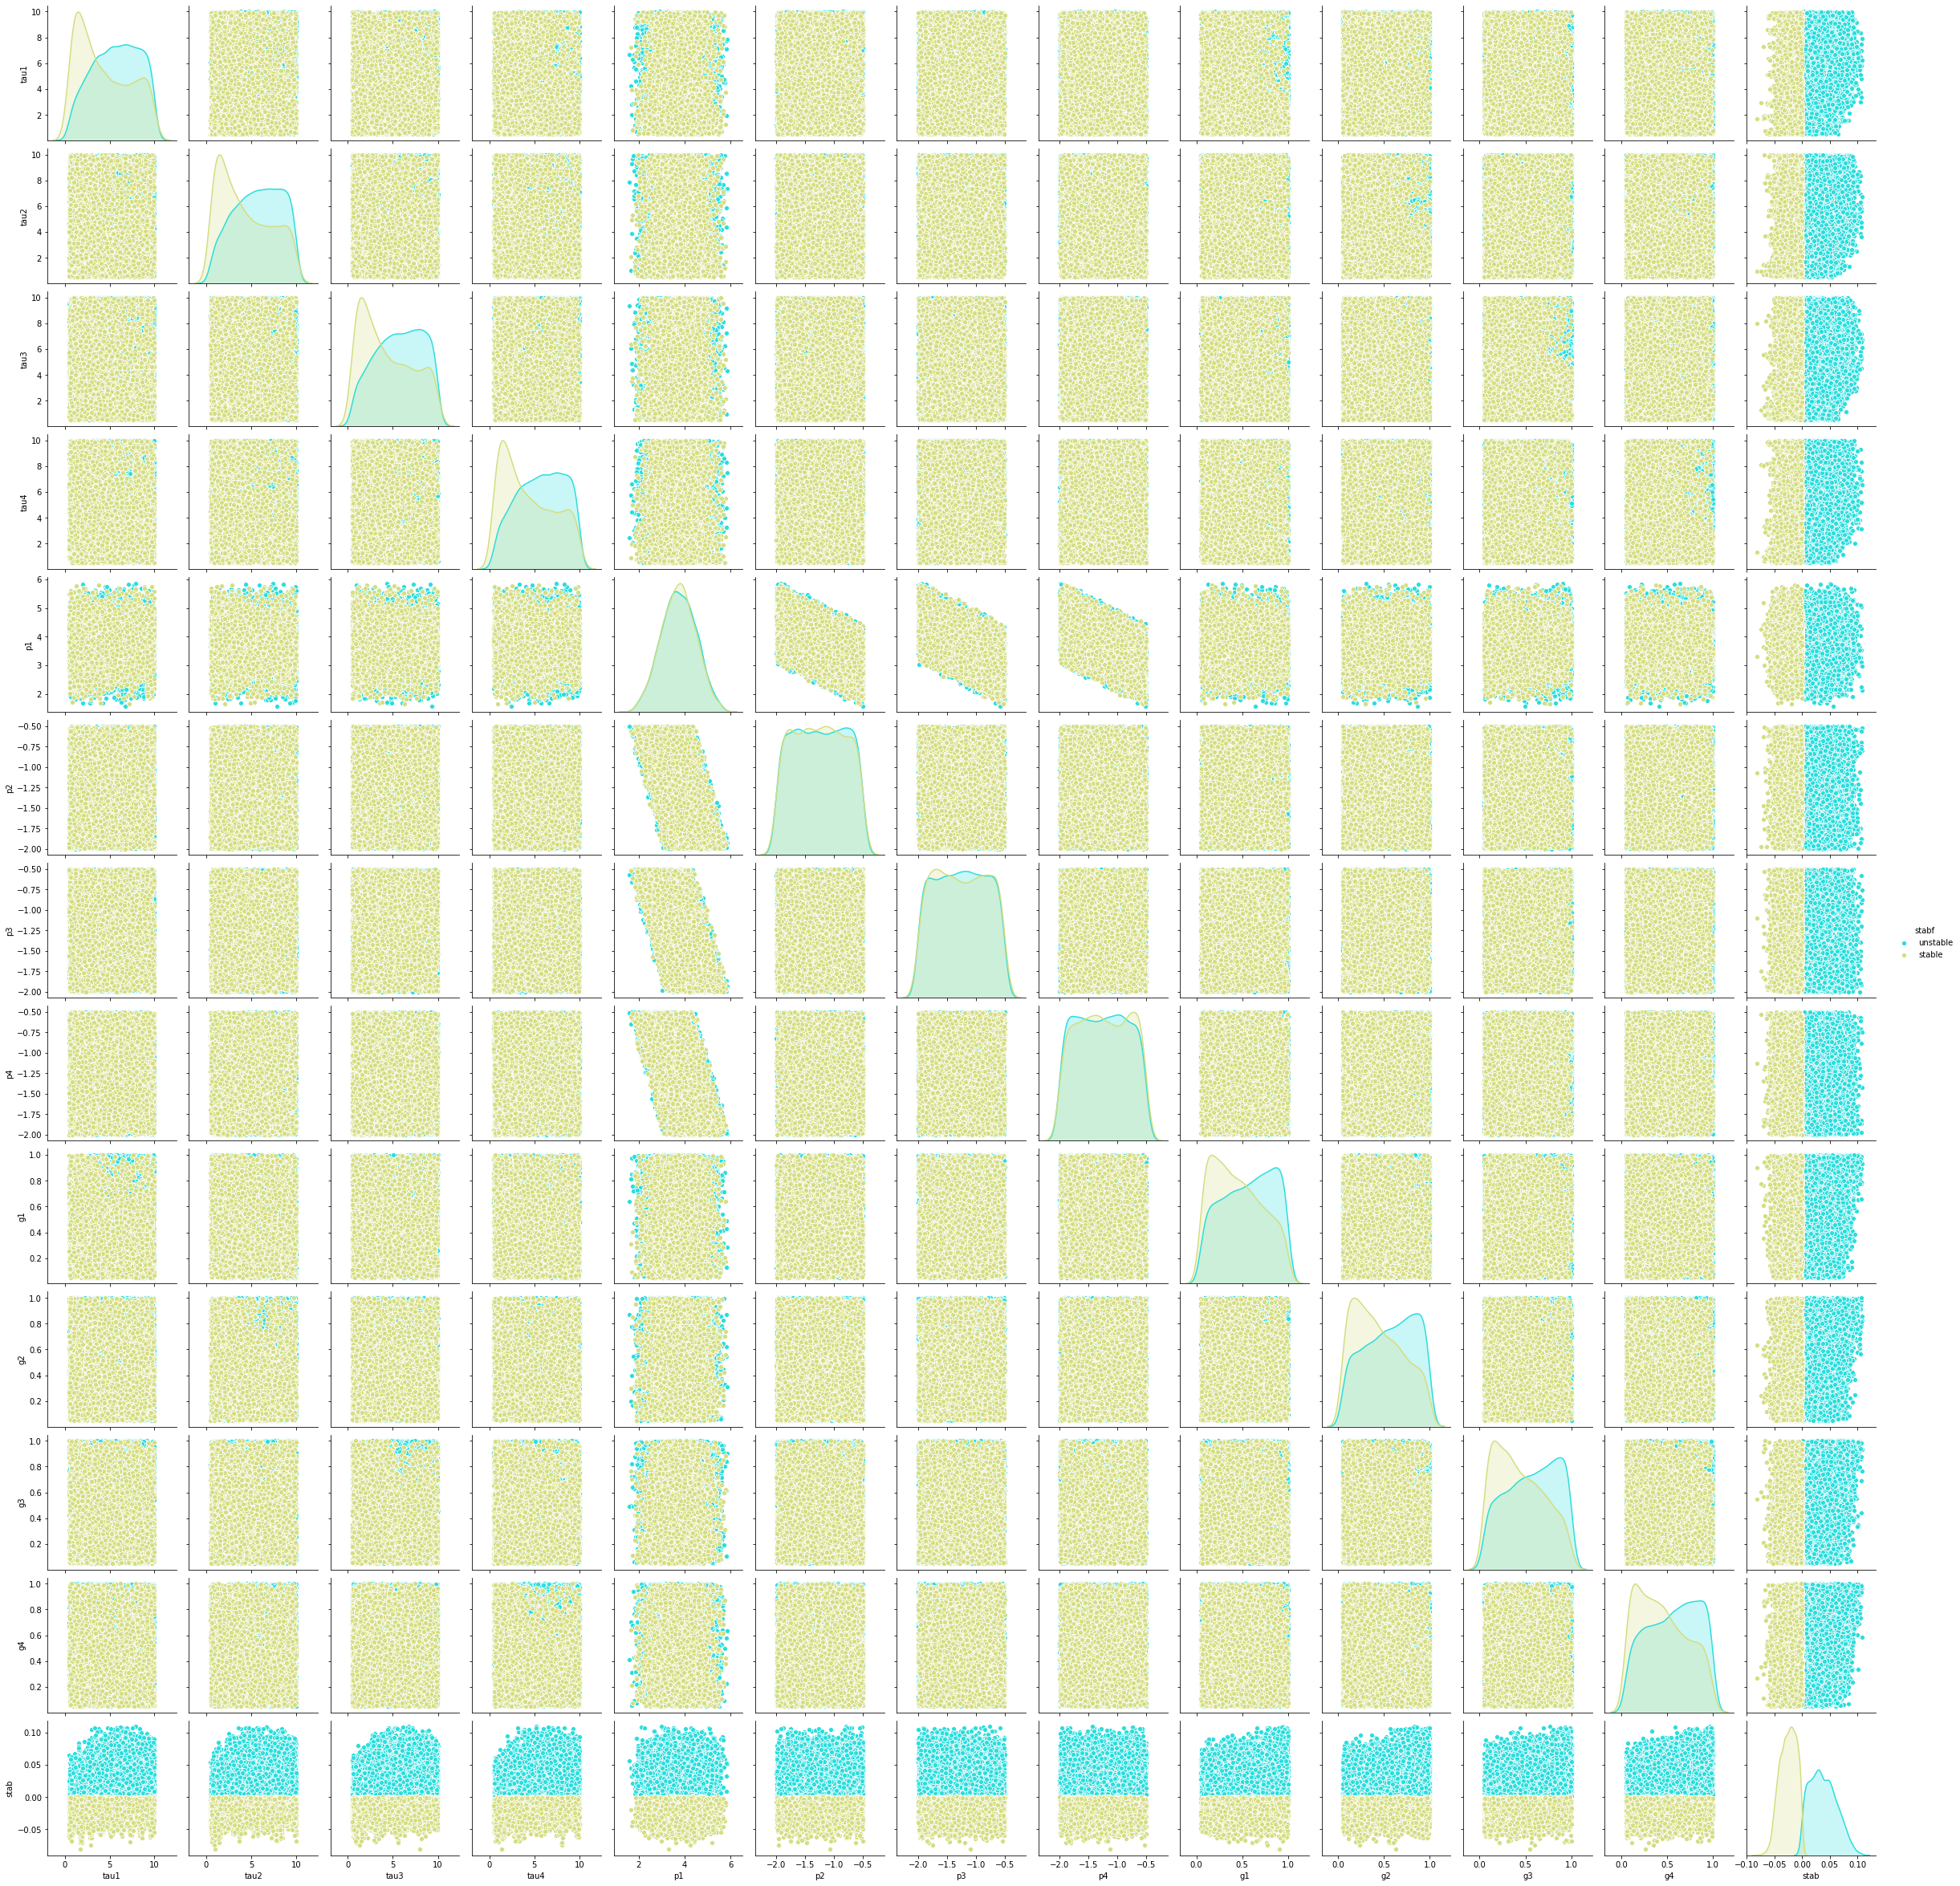

In [ ]:
sns.pairplot(df,hue='stabf',palette='rainbow')

It is noticed that the predictors 'p1', 'p2', 'p3', 'p4, have some correlation between then.
Since we are not dealing with minimizing predictor correlation, it would be looked at in future. 

The 'stab' predictor has a clean cluster. It would be dropped so our model can use the other predictors only.

### Distribution of target / outcome - 'stabf'

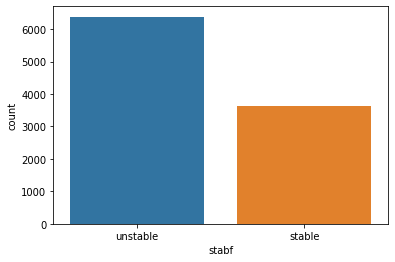

In [ ]:
sns.countplot(x='stabf', data = df)
#plt.show()

In [ ]:
#sns.violinplot(x="stabf", y="tau1", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="tau2", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="tau3", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="tau4", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="p1", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="p2", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="p3", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="p4", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="g1", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="g2", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="g3", data=df,hue='stabf',palette='Set1')
#sns.violinplot(x="stabf", y="g4", data=df,hue='stabf',palette='Set1')
#plt.show()

## Feature Engineering

Droping df.stab since it is derived from the other features and split the data

In [ ]:
data_df = df.drop(columns=['stab'])
predictors = data_df.drop(columns=['stabf'])
outcome = data_df['stabf']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [ ]:
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.columns)

In [ ]:
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns)

In [ ]:
normalised_train_df

tau1      tau2      tau3  ...        g2        g3        g4
0     0.367327 -0.986042  0.650447  ...  0.339859  0.585568  0.492239
1    -0.064659  0.089437  1.035079  ... -1.558488  1.429649 -1.443521
2    -1.467850  1.298418 -0.502536  ...  1.451534 -1.045743  0.492489
3     0.820081  0.529920  1.299657  ...  1.361958  1.604140  0.275303
4     0.665424 -1.425627  0.312300  ...  0.695660  1.137504 -1.312575
...        ...       ...       ...  ...       ...       ...       ...
7995  1.551314  0.007408 -1.177640  ...  0.313976 -1.625728 -0.637401
7996  1.015925 -0.223483 -1.489381  ... -0.755209  0.734821 -0.304433
7997  0.657609 -0.722756 -1.405888  ...  0.293100 -1.550587  0.810344
7998 -0.059316 -1.260532 -1.010471  ... -0.388255 -0.726781  1.667916
7999 -1.473214  0.638438  0.250122  ... -1.174110  1.179282  0.783627

[8000 rows x 12 columns]

# MODEL BUILDING

## Randorm Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(normalised_train_df, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
new_predictions = rf_model.predict(normalised_test_df)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['stable', 'unstable'])

array([[ 625,   87],
       [  55, 1233]])

In [ ]:
s_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)

In [ ]:
print('Accuracy: {}'.format(round(accuracy_score(y_true=y_test, y_pred=new_predictions)*100), 2))
print(pd.DataFrame([[s_prec,s_rcal,s_f1sc],[uns_prec,uns_rcal,uns_f1sc]], columns=['Precision', 'Recall', 'F1 Score'], index=['stable', 'unstable']))

Accuracy: 93.0
          Precision  Recall  F1 Score
stable         92.0    88.0      90.0
unstable       93.0    96.0      95.0


## Extra Trees

In [ ]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features}

In [ ]:
ext_model = ExtraTreesClassifier(random_state=1)
clf = RandomizedSearchCV(ext_model, hyperparameter_grid, n_iter=10, cv=5, random_state=1)
model = clf.fit(normalised_train_df, y_train)

In [ ]:
new_predictions = model.predict(normalised_test_df)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['stable', 'unstable'])

array([[ 619,   93],
       [  53, 1235]])

In [ ]:
s_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)

In [ ]:
print('Accuracy: {}'.format(round(accuracy_score(y_true=y_test, y_pred=new_predictions)*100), 2))
print(pd.DataFrame([[s_prec,s_rcal,s_f1sc],[uns_prec,uns_rcal,uns_f1sc]], columns=['Precision', 'Recall', 'F1 Score'], index=['stable', 'unstable']))

Accuracy: 93.0
          Precision  Recall  F1 Score
stable         92.0    87.0      89.0
unstable       93.0    96.0      94.0


Print winning set of hyperparameters

In [ ]:
pprint(model.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


## Extreme Gradient Boosting

In [ ]:
xgb_model = XGBClassifier(random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.921 (0.011)


In [ ]:
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(normalised_train_df, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
new_predictions = xgb_model.predict(normalised_test_df)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['stable', 'unstable'])

array([[ 603,  109],
       [  52, 1236]])

In [ ]:
s_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)

In [ ]:
print('Accuracy: {}'.format(round(accuracy_score(y_true=y_test, y_pred=new_predictions)*100), 2))
print(pd.DataFrame([[s_prec,s_rcal,s_f1sc],[uns_prec,uns_rcal,uns_f1sc]], columns=['Precision', 'Recall', 'F1 Score'], index=['stable', 'unstable']))

Accuracy: 92.0
          Precision  Recall  F1 Score
stable         92.0    85.0      88.0
unstable       92.0    96.0      94.0


## Light Gradient Boosting

In [ ]:
lgbm_model = LGBMClassifier(random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lgbm_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.942 (0.008)


In [ ]:
lgbm_model = LGBMClassifier(random_state=1)
lgbm_model.fit(normalised_train_df, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
new_predictions = lgbm_model.predict(normalised_test_df)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['stable', 'unstable'])

array([[ 635,   77],
       [  48, 1240]])

In [ ]:
s_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_prec = round(precision_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_rcal = round(recall_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)
s_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')*100)
uns_f1sc = round(f1_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')*100)

In [ ]:
print('Accuracy: {}'.format(round(accuracy_score(y_true=y_test, y_pred=new_predictions)*100), 2))
print(pd.DataFrame([[s_prec,s_rcal,s_f1sc],[uns_prec,uns_rcal,uns_f1sc]], columns=['Precision', 'Recall', 'F1 Score'], index=['stable', 'unstable']))

Accuracy: 94.0
          Precision  Recall  F1 Score
stable         93.0    89.0      91.0
unstable       94.0    96.0      95.0


# QUIZ

In [ ]:
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.columns)

In [ ]:
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns)

### Q 14

In [ ]:
new_predictions = rf_model.predict(normalised_test_df)
round(accuracy_score(y_true=y_test, y_pred=new_predictions),4)

0.929

### Q 15

In [ ]:
new_predictions = xgb_model.predict(normalised_test_df)
round(accuracy_score(y_true=y_test, y_pred=new_predictions), 4)

0.9195

### Q 16

In [ ]:
new_predictions = lgbm_model.predict(normalised_test_df)
round(accuracy_score(y_true=y_test, y_pred=new_predictions), 4)

0.9375

### Q 17

In [ ]:
ext_model.fit(normalised_train_df, y_train)
new_predictions = ext_model.predict(normalised_test_df)
round(accuracy_score(y_true=y_test, y_pred=new_predictions), 4)

0.928

In [ ]:
pprint(model.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


### Q 18

In [ ]:
ext_model = ExtraTreesClassifier(n_estimators = 1000, min_samples_leaf = 8, min_samples_split = 2, max_features = None ,random_state=1)
ext_model.fit(normalised_train_df, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [ ]:
new_predictions = ext_model.predict(normalised_test_df)
round(accuracy_score(y_true=y_test, y_pred=new_predictions), 4)

0.927

### Q 20

In [423]:
# Computing the importance of each feature 
ext_model.fit(normalised_train_df, y_train)
feature_importance = pd.concat([pd.DataFrame(ext_model.feature_importances_), pd.DataFrame(x_train.columns)], axis = 1)

In [439]:
feature_importance = pd.concat([pd.DataFrame(ext_model.feature_importances_), pd.DataFrame(x_train.columns)], axis = 1)
feature_importance.columns = ['importance', 'feature']

In [440]:
feature_importance.head()

importance feature
0    0.137240    tau1
1    0.140508    tau2
2    0.134680    tau3
3    0.135417    tau4
4    0.003683      p1

In [450]:
print('Minimum: {}'.format(feature_importance[feature_importance['importance'].min()==feature_importance['importance']]['feature']))

Minimum: 4    p1
Name: feature, dtype: object


In [449]:
print('Maximum: {}'.format(feature_importance[feature_importance['importance'].max()==feature_importance['importance']]['feature']))

Maximum: 1    tau2
Name: feature, dtype: object
